<a href="https://colab.research.google.com/github/jaswanthg76/machine_learning/blob/main/Cifar10_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from keras.datasets import  cifar10

# Importing Dataset


In [33]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

#Data Visualization


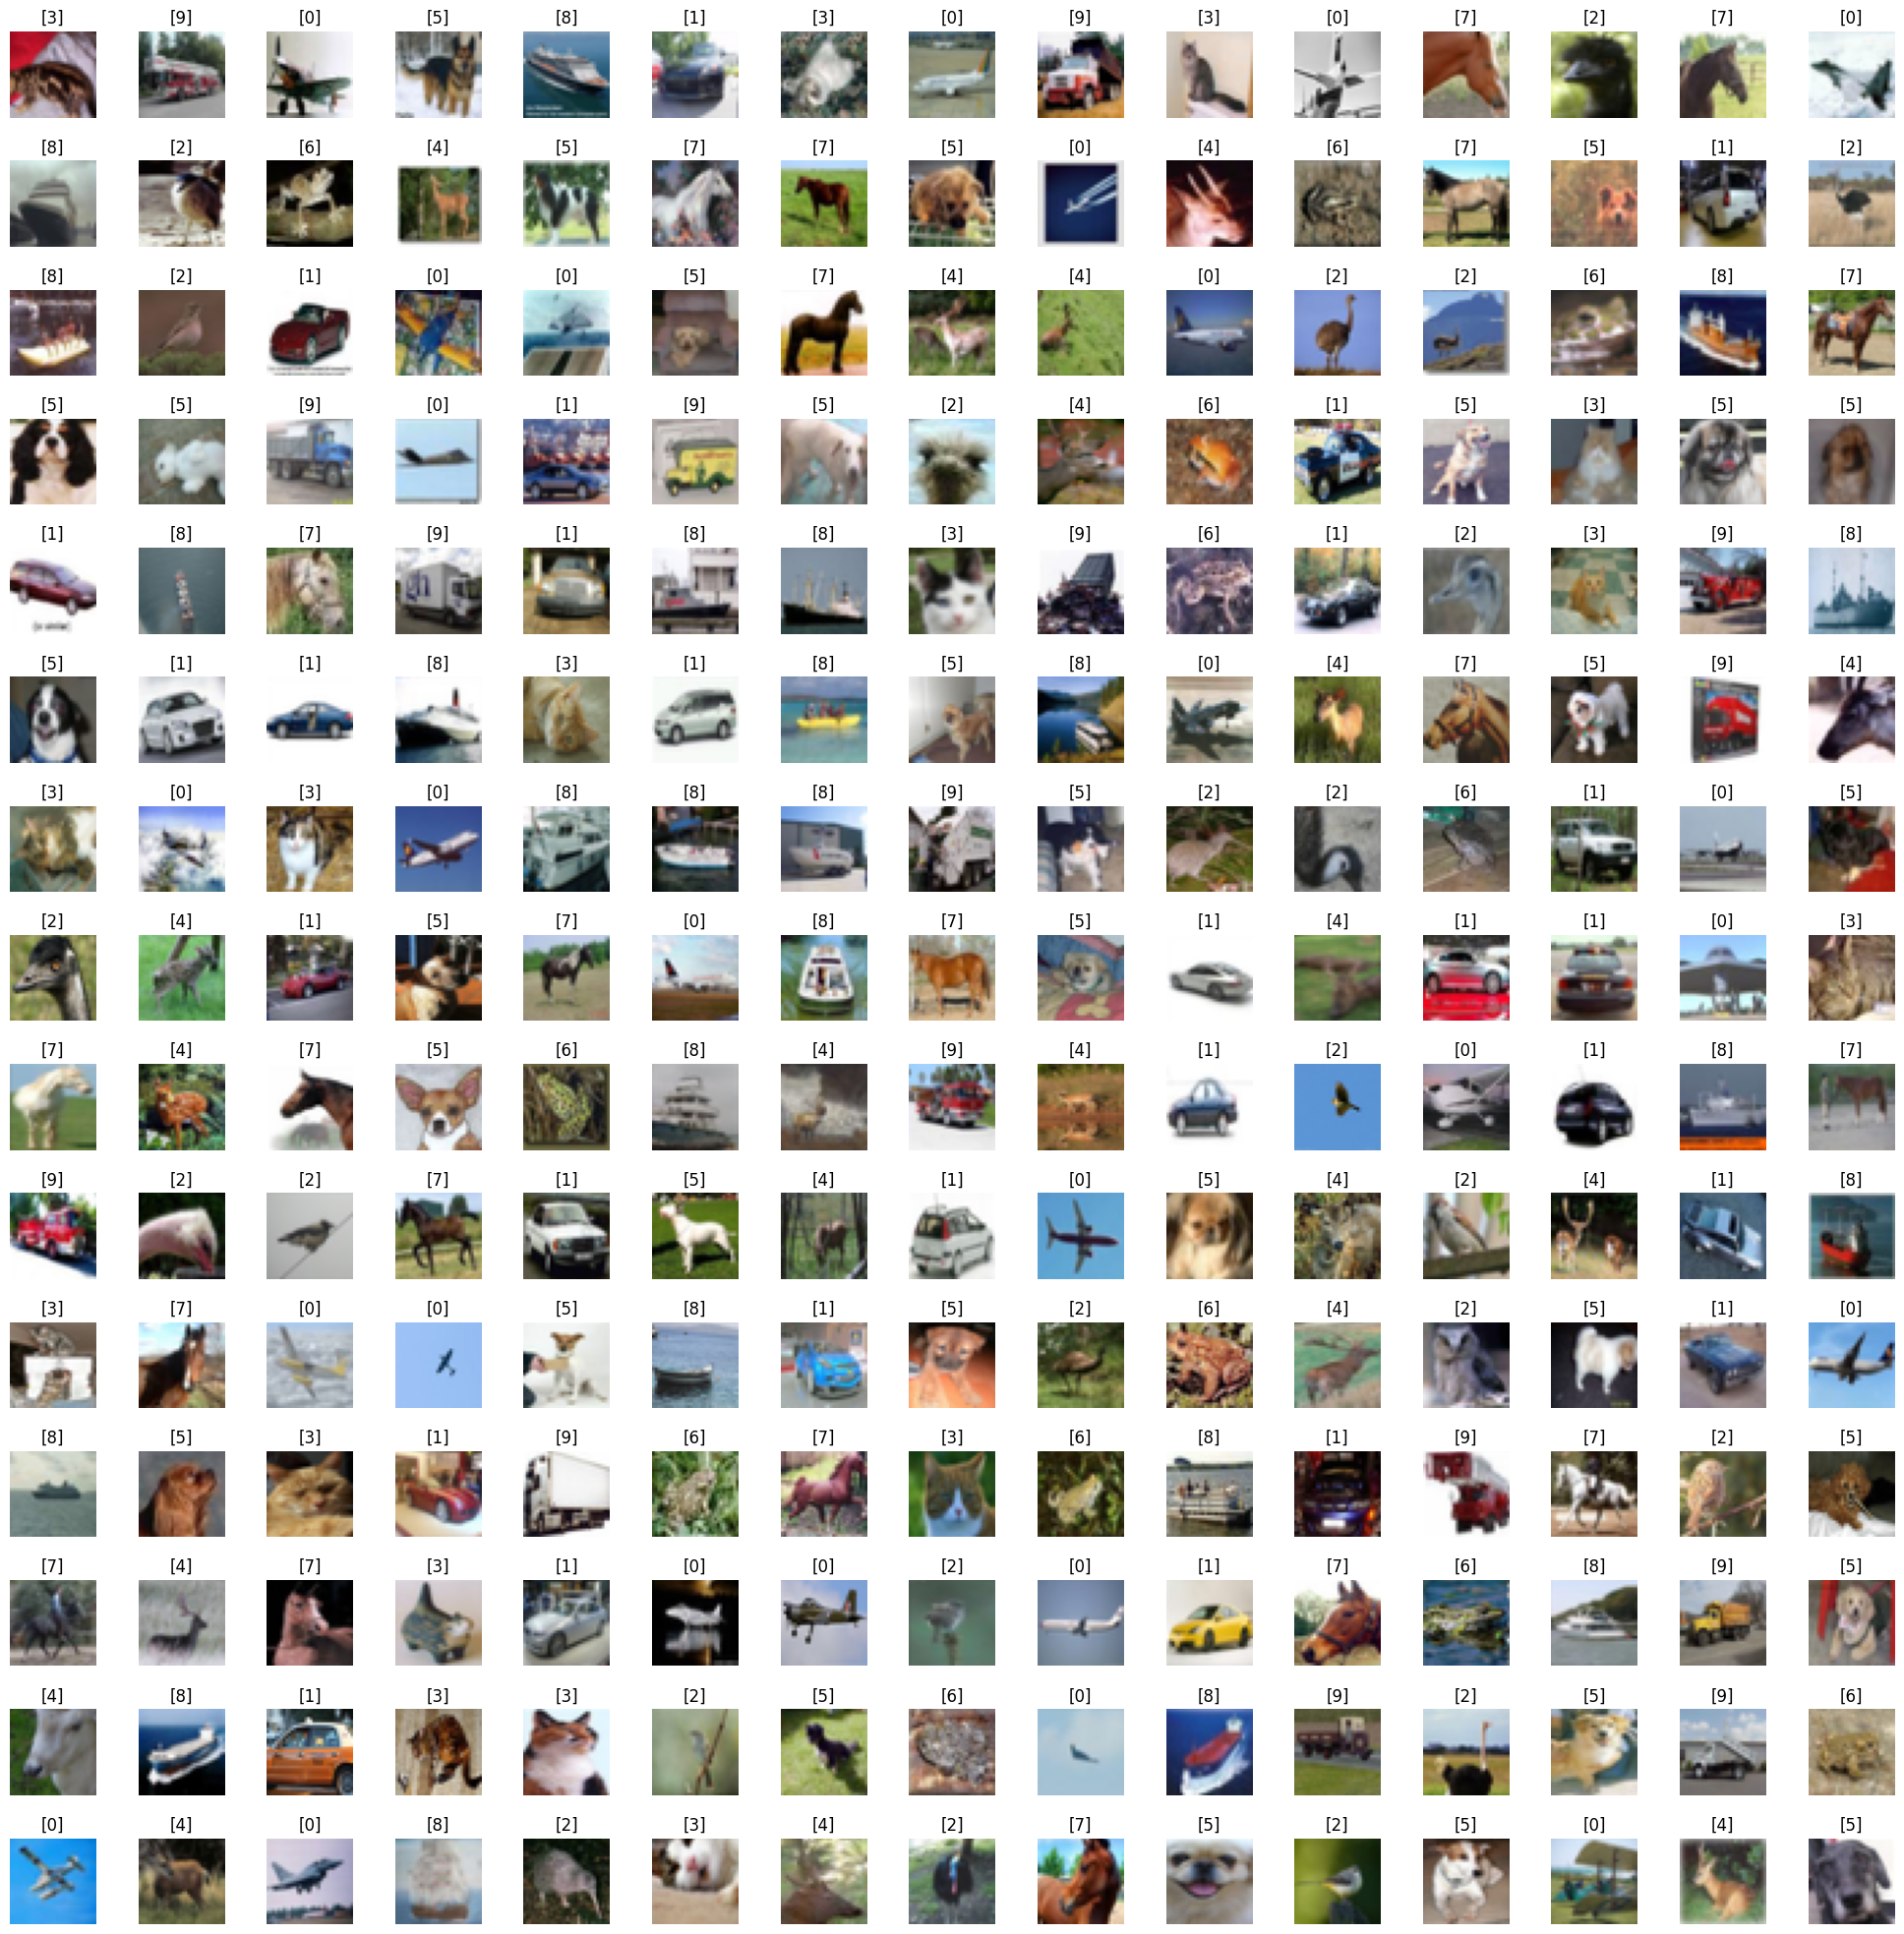

In [34]:
W_length =15
L_length = 15

fig ,axes = plt.subplots(W_length,L_length,figsize=(25,25))

axes = axes.ravel()
for i in range(W_length*L_length):
    index = np.random.randint(x_train.shape[0])
    img = x_train[index]
    axes[i].imshow(img)
    axes[i].set_title(y_train[index])

    axes[i].axis('off')
plt.subplots_adjust(hspace=0.5)


#Preprocessing Data


In [35]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')


In [36]:
cat_number = 10
y_train

array([[6.],
       [9.],
       [9.],
       ...,
       [9.],
       [1.],
       [1.]], dtype=float32)

Encoding


In [37]:
import keras
y_train = keras.utils.to_categorical(y_train,cat_number)
y_test = keras.utils.to_categorical(y_test,cat_number)


Normalization

In [38]:
x_train = x_train/255
x_test = x_test/255

In [39]:
Input_shape = x_train.shape[1:]
Input_shape

(32, 32, 3)

#Model Training


Importing libraries


In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Model


In [41]:
Model = Sequential()
Model.add(Conv2D(32,(3,3),activation='relu',input_shape=Input_shape))      #convulational layer
Model.add(Conv2D(32,(3,3),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Dropout(0.3))


Model.add(Conv2D(64,(3,3),activation='relu'))      #convulational layer
Model.add(Conv2D(64,(3,3),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))              #Pooling
Model.add(Dropout(0.2))

Model.add(Flatten())                               #Flattening
Model.add(Dense(512,activation='relu'))            #Fully connected layer
Model.add(Dense(512,activation='relu'))

Model.add(Dense(cat_number,activation='softmax'))  #Output layer

Model compilation

In [42]:
Model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
x_train.shape


(50000, 32, 32, 3)

In [43]:
history = Model.fit(x_train,y_train,batch_size=32,epochs=2,shuffle=True)

Epoch 1/2
1563/1563 [==============================] - 169s 107ms/step - loss: 1.6068 - accuracy: 0.4166
Epoch 2/2
1563/1563 [==============================] - 163s 105ms/step - loss: 1.1874 - accuracy: 0.5818


In [45]:
evaluation = Model.evaluate(x_test,y_test)
print(evaluation[1])

313/313 [==============================] - 10s 29ms/step - loss: 1.0968 - accuracy: 0.6168
0.6168000102043152
